<a href="https://colab.research.google.com/github/ezigou/Data-Science-Techniques-and-Applications-Part-2/blob/main/DSTA_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# load dataset 
data= pd.read_csv("tumor.csv")
data = data.drop(columns='Sample code number')

In [ ]:
# Get the name of each column after erasing the code number column
dic_names = {index: value for index, value in enumerate(data.columns)}
dic_names

{0: 'Clump Thickness',
 1: 'Uniformity of Cell Size',
 2: 'Uniformity of Cell Shape',
 3: 'Marginal Adhesion',
 4: 'Single Epithelial Cell Size',
 5: 'Bare Nuclei',
 6: 'Bland Chromatin',
 7: 'Normal Nucleoli',
 8: 'Mitoses',
 9: 'Class'}

In [ ]:
# separate predictors and target
X = data.drop(columns='Class')
Y = data[['Class']]

# dataset with selected predictors and target
# separate selected predictors and target
x = data[['Uniformity of Cell Size','Uniformity of Cell Shape', 'Bare Nuclei']]
y = Y

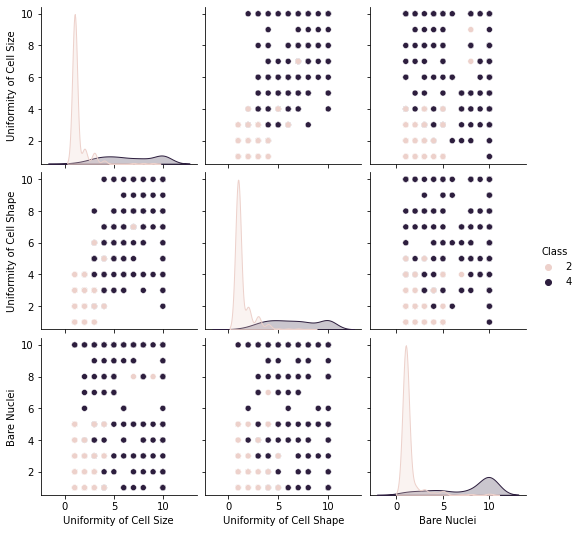

In [ ]:
# pair plot of selected features coloured by class
sns.pairplot(data[['Uniformity of Cell Size','Uniformity of Cell Shape', 'Bare Nuclei', 'Class']],hue= 'Class')

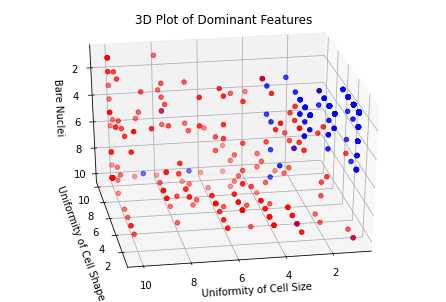

In [ ]:
# Create 3D Scatter Plot of dominant features
plot = Axes3D(plt.figure(1),elev=-150, azim=100)
plot.scatter(x['Uniformity of Cell Size'],x['Uniformity of Cell Shape'],x['Bare Nuclei'], c = y, cmap = plt.cm.bwr)
plot.set_title("3D Plot of Dominant Features")
plot.set_xlabel("Uniformity of Cell Size")
plot.set_ylabel("Uniformity of Cell Shape")
plot.set_zlabel("Bare Nuclei")
plt.show()

In [ ]:
# Standarise data

# all features
X_scaler = StandardScaler().fit(X)
X_rescaled = X_scaler.transform(X)

# selected features
x_scaler = StandardScaler().fit(x)
x_rescaled = x_scaler.transform(x)

Explained variance: [0.65549993 0.08621632 0.05991692 0.05106972 0.04225287 0.03354183
 0.03271141 0.02897065 0.00982036]
          0         1         2  ...         6         7         8
0  0.302063  0.380793  0.377583  ...  0.345747  0.335591  0.230206
1 -0.140801 -0.046640 -0.082422  ... -0.228077  0.033966  0.905557
2 -0.866372  0.019938 -0.033511  ...  0.213072  0.134248 -0.080492
3 -0.107828  0.204255  0.175866  ... -0.013047  0.417113 -0.258988
4 -0.080321  0.145653  0.108392  ... -0.227666 -0.690210 -0.105042
5  0.242518  0.139032  0.074527  ... -0.298897 -0.021518 -0.148345
6  0.008516  0.205434  0.127209  ...  0.700417 -0.459783  0.132117
7  0.247707 -0.436300 -0.582727  ...  0.383719  0.074012 -0.053537
8  0.002747  0.733211 -0.667481  ... -0.062241  0.022079 -0.007496

[9 rows x 9 columns]


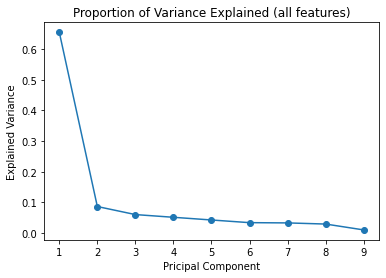

In [ ]:
# PCA analysis on all features
fit = PCA(n_components=9).fit(X_rescaled)
explained_variance = fit.explained_variance_ratio_
print("Explained variance: %s" % explained_variance)
print(pd.DataFrame(fit.components_))

# Variance explained Plot
plt.plot(explained_variance, marker = 'o') 
plt.xlabel('Pricipal Component')
plt.xticks(np.arange(0,9,step=1), ['1','2','3','4','5','6','7','8','9']) 
plt.ylabel('Explained Variance')
plt.title("Proportion of Variance Explained (all features)")
plt.show()

# Create the new dimensional space
fit = PCA(n_components=3).fit(X_rescaled)
X_PCA = fit.fit_transform(X_rescaled)

Explained variance: [0.84872148 0.12057982 0.0306987 ]
          0         1         2
0  0.592356  0.597242  0.540755
1  0.416636  0.347395 -0.840078
2  0.689586 -0.722923  0.043051


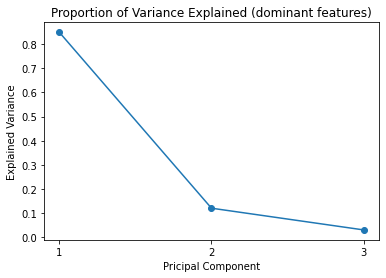

In [ ]:
# PCA analysis on selected features
fit = PCA(n_components=3).fit(x_rescaled)
explained_variance = fit.explained_variance_ratio_
print("Explained variance: %s" % fit.explained_variance_ratio_)
print(pd.DataFrame(fit.components_))

# Variance explained Plot
plt.plot(explained_variance, marker = "o") 
plt.xlabel('Pricipal Component')
plt.xticks(np.arange(0,3,step=1), ['1','2','3']) 
plt.ylabel('Explained Variance')
plt.title("Proportion of Variance Explained (dominant features)")
plt.show()

# Create the new dimensional space
x_PCA = fit.fit_transform(x_rescaled)

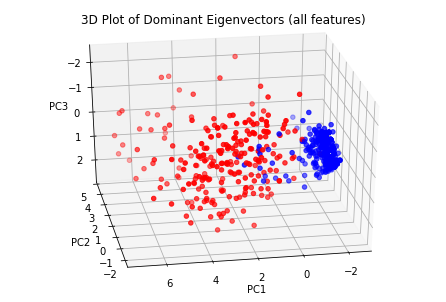

In [ ]:
# Create 3D Scatter Plot of eigenvectors - ALL FEATURES
plot = Axes3D(plt.figure(1),elev=-150, azim=100)
plot.scatter(X_PCA[:,0],X_PCA[:,1],X_PCA[:,2], c = y, cmap = plt.cm.bwr)
plot.set_title("3D Plot of Dominant Eigenvectors (all features)")
plot.set_xlabel("PC1")
plot.set_ylabel("PC2")
plot.set_zlabel("PC3")
plt.show()

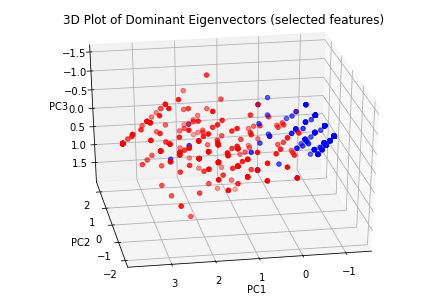

In [ ]:
# Create 3D Scatter Plot of eigenvectors - DOMINANT FEATURES
plot = Axes3D(plt.figure(1),elev=-150, azim=100)
plot.scatter(x_PCA[:,0],x_PCA[:,1],x_PCA[:,2], c = y, cmap = plt.cm.bwr)
plot.set_title("3D Plot of Dominant Eigenvectors (selected features)")
plot.set_xlabel("PC1")
plot.set_ylabel("PC2")
plot.set_zlabel("PC3")
plt.show()

In [ ]:
# Split into train and test sets

# normalised data (All features before PCA)
resc_X_train, resc_X_test, resc_Y_train, resc_Y_test = train_test_split(X_rescaled, Y, test_size=0.3, random_state=6) 

# with PCA on all features
X_train, X_test, Y_train, Y_test = train_test_split(X_PCA, Y, test_size=0.3, random_state=6) 
# with PCA on dominant features
x_train, x_test, y_train, y_test = train_test_split(x_PCA, y, test_size=0.3, random_state=6) 

In [ ]:
# SVM Classification
model = SVC(kernel='rbf')

# to all data without PCA
model.fit(resc_X_train, resc_Y_train)
resc_Y_predicted = model.predict(resc_X_test)
acc = accuracy_score(resc_Y_test, resc_Y_predicted) 
error_2 = confusion_matrix(resc_Y_test, resc_Y_predicted)[1,0]
print("Accuracy:", acc, " and Error Type 2:", error_2)

# to all features
model.fit(X_train, Y_train)
Y_predicted = model.predict(X_test)
acc = accuracy_score(Y_test, Y_predicted) 
error_2 = confusion_matrix(Y_test, Y_predicted)[1,0]
print("Accuracy:", acc, " and Error Type 2:", error_2)

# to dominant features
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)
acc = accuracy_score(y_test, y_predicted) 
error_2 = confusion_matrix(y_test, y_predicted)[1,0]
print("Accuracy:", acc, " and Error Type 2:", error_2)

Accuracy: 0.9804878048780488  and Error Type 2: 1
Accuracy: 0.975609756097561  and Error Type 2: 1
Accuracy: 0.9560975609756097  and Error Type 2: 4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
